In [2]:
import numpy as np
import pandas as pd

# preprocess train data
df = pd.read_csv("train.csv")
df = df.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df = pd.get_dummies(df)
df["Age"].fillna(df.Age.median(), inplace=True)
df["Fare"].fillna(df.Fare.median(), inplace=True)

# preprocess test data
df_test = pd.read_csv("test.csv")
df_test = df_test.loc[:, ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df_test = pd.get_dummies(df_test)
df_test["Age"].fillna(df_test.Age.median(), inplace=True)
df_test["Fare"].fillna(df_test.Fare.median(), inplace=True)

# print
#pd.set_option("display.max_rows", 500)
#df_test

In [3]:
# standardize
from sklearn.preprocessing import MinMaxScaler
std_df = pd.DataFrame(MinMaxScaler().fit_transform(df.as_matrix()))
std_df_test = pd.DataFrame(MinMaxScaler().fit_transform(df_test.as_matrix()))

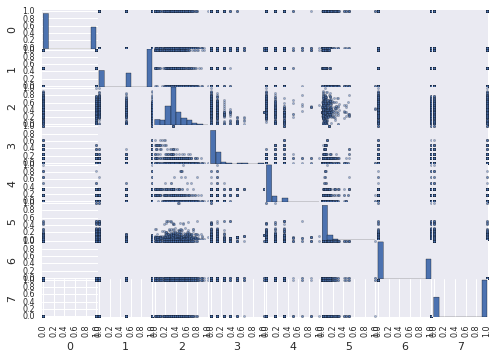

In [4]:
# plot scatter matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix(std_df)
pass

In [5]:
from sklearn import cross_validation
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# independent and dependent variables
X = std_df.drop([0],axis=1).as_matrix()
y = std_df[0].as_matrix()

# cross validation
kfold = cross_validation.KFold(len(X), n_folds=5)
for train, test in kfold:
  #clf = LogisticRegression()
  #clf = SVC()
  clf = RandomForestClassifier()
  clf.fit(X[train], y[train])
  print metrics.accuracy_score(clf.predict(X[test]), y[test])

0.776536312849
0.797752808989
0.85393258427
0.752808988764
0.842696629213


In [6]:
print metrics.classification_report(y[test], clf.predict(X[test]))

             precision    recall  f1-score   support

        0.0       0.89      0.86      0.88       115
        1.0       0.76      0.81      0.78        63

avg / total       0.85      0.84      0.84       178



In [7]:
# predict
X_test = std_df_test.drop([0],axis=1)
y_test = clf.predict(X_test)

In [8]:
# export to CSV
df_test['Survived'] = y_test.astype(np.int)
df_test.to_csv("predict.csv", sep=",", columns=['PassengerId', 'Survived'], index=False)